## MIDS UC Berkeley, Machine Learning at Scale
## DATSCIW261 ASSIGNMENT #6

Names Safyre Anderson, Howard Wen , Vamsi Sakhamuri

Emails safyre@berkeley.edu, howard.wen1@gmail.com, vamsi@ischool.berkeley.edu

Time of Initial Submission: February 18th, 2016 8am PST

Section W261-3, Spring 2016

Week 6 Homework


### HW6.0. 

*In mathematics, computer science, economics, or management science what is mathematical optimization? Give an example of a optimization problem that you have worked with directly or that your organization has worked on. Please describe the objective function and the decision variables. Was the project successful (deployed in the real world)? Describe.*

From the async: **Mathematical Optimization** select of the best element with regard to some criteria from a set of available alternatives. Simply put, given a range of values we'd like to optimize on(often in our case, model coefficients/ weights) we choose the value(s) that get us closest to our optimization critera. This could mean achieving the lowest error or the highest information purity, for instance.

The **objective function** (or loss function/ cost function) is a function that we aim to maximize or minimize (usually minimize) in order to determine what input values we should use in our model. Examples of an objective function include the mean-squared error, various variance functions.

### HW6.1 
**Optimization theory:**

*For unconstrained univariate optimization what are the first order  Necessary Conditions for Optimality (FOC).  What are the second order optimality conditions (SOC)? Give a mathematical defintion. Also in python, plot the univartiate function* 
*$X^3 - 12x^2-6$ defined over the real  domain $-6$ to $+6$.* 

*Also plot its corresponding first and second derivative functions. Eyeballing these graphs, identify candidate optimal points and then classify them as local minimums or maximums. Highlight and label these points in your graphs. Justify your responses using the FOC and SOC.*

*For unconstrained multi-variate optimization what are the first order  Necessary Conditions for Optimality (FOC).  What are the second order optimality conditions (SOC)? Give a mathematical defintion. What is the Hessian matrix in this context?*

**First Order Optimization Conditions (FOC)** Given an objective function ($J(\Theta)$) that we would like to solve, the FOCs are that the first order (partial) derivative(s) ($\frac{\partial J(\Theta)}{\partial \theta}$) have roots:
$\frac{\partial J(\Theta = \Theta^*)}{\partial \theta} = 0$.

For the multivariate case, we look to see if the **gradient function** reaches 0.


Which basicially means if we want to optimize our objective function, it needs local minima and/or maxima to optimize on. If there aren't any extremes, we will never find an optimal set of parameters.

**Second Order Optimization Conditions (SOC)**
Given that our FOCs are met, then we look at the second derivatives to determine the type of extreme we've identified at the roots. If the second derivative

- Maximum 
$\frac{\partial J(\Theta = \Theta^*)}{\partial^2 \Theta} > 0$ Then the extreme is a local maximum at $\Theta^*$.

For the multivariate case, we check if the Hessian is negative definite (eigen-values are negative) at the root of the gradient to see if the extreme is a maximum (**concave**).

- Minimum 
$\frac{\partial J(\Theta= \Theta^*)}{\partial^2 \Theta} < 0$ Then the extreme is a local minimum at $\Theta^*$.

For the multivariate case, we check if the Hessian is positive definite (eigen-values are positive) at the root of the gradient to see if the extreme is a minimum (**convex**).

$\frac{\partial J(\Theta= \Theta^*)}{\partial^2 \Theta} = 0$ Then there aren't extremes (there is no change in slope in the first derivative.

**Hessian Matrix** The Hessian is a matrix of second order partial derivatives for each weight with respect to the objective function. Each second partial is obtained from $f(x)$ by taking the partial derivative of $x_i$ and taking that derivative with respect to $x_j$. On the diagonal of the Hessian, $i=j$.




/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


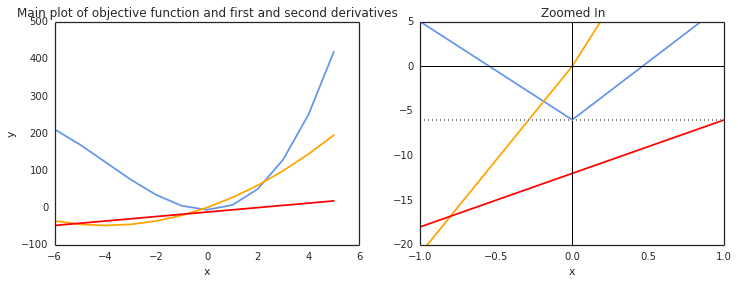

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re,math
import matplotlib.patches as mpatches
%matplotlib inline

x = range(-6,6)
y = [i**3 + 12*i**2 - 6 for i in x]
y_prime = [3*i**2 +24*i for i in x]
y_double = [6*i -12 for i in x]


color = 'cornflowerblue'
points = np.ones(5)  # Draw 5 points for each line
text_style = dict(horizontalalignment='right', verticalalignment='center',
                  fontsize=12, fontdict={'family': 'times'})


# styling
sns.set(style="white", palette="muted", color_codes=True)
# Plot all line styles.
plt.figure(figsize = (12, 4))
y_patch = mpatches.Patch(color='cornflowerblue', label='f(x)' )
yy_patch = mpatches.Patch(color='orange', label='f\'(x)' )
yyy_patch = mpatches.Patch(color='red', label='f\'\'(x)' )

# begin plots
# whole figure
plt.subplot(1,2,1)
plt.plot(x, y, 'cornflowerblue')
plt.plot(x, y_prime, 'orange')
plt.plot(x, y_double, 'red')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(handles=[y_patch,yy_patch,yyy_patch])
plt.title("Main plot of objective function and first and second derivatives")

# zoom in a bit to see the extreme 
plt.subplot(1,2,2)
plt.plot(x, y, 'cornflowerblue')
plt.plot(x, y_prime, 'orange')
plt.plot(x, y_double, 'red')
plt.axvline(x = 0, color = 'black', lw = 1) #not the actual root, but close enough
plt.axhline(y = -6, color = 'gray', lw = 2, linestyle= ':') #not the actual root, but close enough
plt.axhline(y = 0, color = 'black', lw = 1) #not the actual root, but close enough
plt.xlabel("x")
plt.legend(handles=[y_patch,yy_patch,yyy_patch])
plt.xlim(-1,1)
plt.ylim(-20,5)
plt.title("Zoomed In")
#plt.show()



From eyeballing the graphs it appears the local extreme occurs at (0, -6). For easier determination, I added lines at x = 0, y = 0, and y = -6. Our FOC has been met: $f'(x)$ (orange) crosses 0, therefore we can conclude there is an extrema. To determine the type of extreme, we evaluate our SOC: $f''(x) < 0$ (red). Therefore or extreme is a minima.

### HW6.2

*Taking $x=1$ as the first approximation($x^{t_1}$) of a root of $x^3 + 2x -4 = 0$, use the Newton-Raphson method to calculate the second approximation (denoted as $x^{t_2}$) of this root. (Hint the solution is $x^{t_2}=1.2$)*

First find the slope of the tangent at x = 1 by evaluating the gradient at that point.

$f'(x) = \frac{d f(x)}{dx} = 3x^2 +2$

$f(x^{t_1}=1) = 1 +2 -4 = -1$

$f'(x^{t_1} =1) = 3 + 2 = 5$

Solve for $x^{t_2}$:

$ 5 = \frac{f(x=1) - 0}{(x=1) - x^{t_2}} $

$x^{t_2} = \frac{5}{5-1} = 1.2 $ 

### HW6.3 Convex optimization 
*What makes an optimization problem convex? What are the first order  Necessary Conditions for Optimality in convex optimization.  What are the second order optimality conditions for convex optimization? Are both necessary to determine the maximum or minimum of candidate optimal solutions?*



- A convex problem refers to an optimization problem where the objective function is convex and it's set of values (x, y) are all "connected". In other words, a convex set is continuous between each pair of x and y.

- In convex optimization, the first order condition for convexity is met when the objective function ($f(x)$) is globally above its tangent evaluated at any $x$ in the domain of $f$. In other words,

    - $f(y) \le f(x) + \nabla f(y)^T (y-x)$ for all $x$, $y$ $\in \texttt{dom}~ f$ 
    
    and
    
    - $\nabla f(x) = 0$
    
- The second order condition for convexity only applies if $f(x)$ is twice differentiable:
    - $ \nabla^2 f(x) \succeq 0$ or $\nabla^2 f(x) \succ 0$ for strongly convex functions.
    
    However, this is not necessary for us to know that a local minima is a global minima. If a problem is convex and the FOC is met, then we know that the second order derivative has a direction.

**Fill in the BLANKS here:**
*Convex minimization, a subfield of optimization, studies the problem of minimizing* **CONVEX** *functions over* **CONVEX** *sets. The* **CONVEXITY** *property can make optimization in some sense "easier" than the general case - for example, any local minimum must be a global minimum.*

### HW 6.4

*The learning objective function for weighted ordinary least squares (WOLS) (aka weight linear regression) is defined as follows:*

$\frac{1}{2} \sum_i^m (w_i (\mathbf{\beta} \cdot \mathbf{x}_i - y_i)^2)$ :Where $i$ is a training example in a set of $1,2,...m$ examples.

*Where training set consists of input variables $\mathbf{x}_i$ ( in vector form) and a target variable $y$, and $\mathbf{\beta}$ is the vector of coefficients ($\beta_i$) for the linear regression model.*

*Derive the gradient for this weighted OLS by hand; showing each step and also explaining each step.*

The gradient of a summation is simply a vector of partial derivatives, we can just take the term inside the summation and evaluate that partial derivative with respect to the coefficients.

First we want to treat $x_i$ as a 1x2 vector of [1, $x_i$]. Therefore the dot product of $beta$ and $x_i$ will reflect the equation for a line ($\beta_0(1) + \beta_1x$). Our new objective function should look something like this:

$\frac{1}{2} \sum_i^m w_i (\beta_0 (1) +\beta_1 x_i - y_i)^2)$

Next to determine the gradient, we need to take the partial derivatives with respect to both coefficients. The weight is a constant, so it gets pulled out of the derivative.

- For $\beta_0$:

    - $\frac{1}{2} \sum_i^m w_i \frac{(\beta_0 +\beta_1 x_i - y_i)^2)}{\partial \beta_0}$ = $\frac{2}{2} \sum_i^m w_i (\beta_0 +\beta_1 x_i - y_i)(1)$
    
    
- For $\beta_1$ :

    - $\frac{1}{2} \sum_i^m w_i \frac{(\beta_1 +\beta_1 x_i - y_i)^2)}{\partial \beta_1}$ = $\frac{2}{2} \sum_i^m w_i (\beta_0 +\beta_1 x_i - y_i)(x_i)$

With the gradients derived, we can plug them into the update functions for gradient descent (For 2D):


$\beta_0^{i+1} := \beta_0^{i} + \alpha \frac{1}{m} \sum_i^m w_i (\beta_0 +\beta_1 x_i - y_i)$

$\beta_1^{i+1} := \beta_1^{i} +  \alpha \frac{1}{m} \sum_i^m  w_i (\beta_0 +\beta_1 x_i - y_i)x_i$

$\therefore$





## HW 6.5
*Write a MapReduce job in MRJob to do the training at scale of a weighted OLS model using gradient descent.*

*Generate one million datapoints just like in the following notebook:  http://nbviewer.ipython.org/urls/dl.dropbox.com/s/kritdm3mo1daolj/MrJobLinearRegressionGD.ipynb*

*Weight each example as follows: *

`weight(x)= abs(1/x)`

*Sample 1% of the data in MapReduce and use the sampled dataset to train a (weighted if available in SciKit-Learn) linear regression model locally using  SciKit-Learn (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)*

*Plot the resulting weighted linear regression model versus the original model that you used to generate the data. Comment on your findings.*


**Generate sample data**

In [49]:
%matplotlib inline
import numpy as np
import pylab 
from numpy.random.mtrand import poisson
print 
# number of points
size = 1000000

# try to add some extra variance to produce heteroscedasticity
x = np.random.uniform(-4, 4, size)
y = x * 1.0 - 4 + np.random.normal(0,0.5,size)  

# save the coordinates of each point
data = zip(x,y)
np.savetxt('/Users/Safyre/Documents/1000000_WeightedLinearRegression.csv',data,delimiter = ",")

# save a sample of 1000
shuffle = np.random.permutation(np.arange(x.shape[0]))
x, y = x[shuffle], y[shuffle]
sample_data = zip(x[:1000], y[:1000])
np.savetxt('/Users/Safyre/Documents/1000_WeightedLinearRegression.csv',sample_data,delimiter = ",")

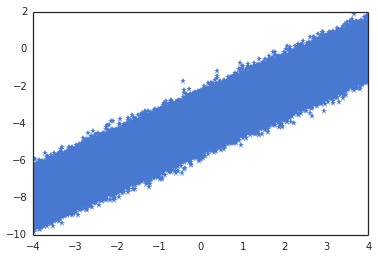

In [50]:
# pretty!
pylab.plot(x, y, '*')
pylab.show()

**MR Job Code adapted from example**

In [51]:
%%writefile MrJobBatchGDUpdate_WeightedLinearRegression.py
from mrjob.job import MRJob

# This MrJob calculates the gradient of the entire training set 
#     Mapper: calculate partial gradient for each example  
#     
class MrJobBatchGDUpdate_WeightedLinearRegression(MRJob):
    # run before the mapper processes any input
    def read_weightsfile(self):
        # Read weights file
        with open('weights.txt', 'r') as f:
            self.weights = [float(v) for v in f.readline().split(',')]
        # Initialze gradient for this iteration
        self.partial_Gradient = [0]*len(self.weights)
        self.partial_count = 0
    
    # Calculate partial gradient for each example 
    def partial_gradient(self, _, line):
        
        # tuple of floats for x, y
        D = (map(float,line.split(',')))
        
        # Since 1/x is the weight, lets put a limit on how small x can get
        # to avoid underflow.
        #if D[0] <0.00001:
        #    D[0] = 0.00001
        
        # create this sample's weight
        w = abs(1/D[0])
        
        # y_hat is the predicted value given current weights
        # y = mx + b
        y_hat = self.weights[0]+self.weights[1]*D[0]
        
        # Update parial gradient vector with gradient from current example
        # the gradient will have one value per coefficient m, b
        # This is where we also apply the weight 1/x
        self.partial_Gradient =  [self.partial_Gradient[0]+ w*(D[1]-y_hat), self.partial_Gradient[1] + w*(D[1]-y_hat)*D[0]]
        self.partial_count = self.partial_count + 1
        #yield None, (D[0]-y_hat,(D[0]-y_hat)*D[1],1)
    
    # Finally emit in-memory partial gradient and partial count
    def partial_gradient_emit(self):
        yield None, (self.partial_Gradient,self.partial_count)
        
    # Accumulate partial gradient from mapper and emit total gradient 
    # Output: key = None, Value = gradient vector
    def gradient_accumulater(self, _, partial_Gradient_Record): 
        total_gradient = [0]*2
        total_count = 0
        for partial_Gradient,partial_count in partial_Gradient_Record:
            total_count = total_count + partial_count
            total_gradient[0] = total_gradient[0] + partial_Gradient[0]
            total_gradient[1] = total_gradient[1] + partial_Gradient[1]
            
        # this is the sum and 1/m term in the gradient descent function
        yield None, [v/total_count for v in total_gradient]
    
    def steps(self):
        return [self.mr(mapper_init=self.read_weightsfile,
                       mapper=self.partial_gradient,
                       mapper_final=self.partial_gradient_emit,
                       reducer=self.gradient_accumulater)] 
    
if __name__ == '__main__':
    MrJobBatchGDUpdate_WeightedLinearRegression.run()

Overwriting MrJobBatchGDUpdate_WeightedLinearRegression.py


**Driver Code Adapted from Example**

In [55]:
%reload_ext autoreload
%autoreload 2

from numpy import random,array
from MrJobBatchGDUpdate_WeightedLinearRegression import MrJobBatchGDUpdate_WeightedLinearRegression

learning_rate = 0.0000005
stop_criteria = 0.00000005

# Generate random values as inital weights
weights = array([random.uniform(-3,3),random.uniform(-3,3)])
# Write the weights to the files
with open('weights.txt', 'w+') as f:
    f.writelines(','.join(str(j) for j in weights))

# create a mrjob instance for batch gradient descent update over all data
mr_job = MrJobBatchGDUpdate_WeightedLinearRegression(args=['/Users/Safyre/Documents/1000000_WeightedLinearRegression.csv','--file','weights.txt', '-r', 'emr'])# \
                                                 
# Update centroids iteratively
i = 0
while(1):
    print "iteration ="+str(i)+"  weights =",weights
    # Save weights from previous iteration
    weights_old = weights
    with mr_job.make_runner() as runner: 
        runner.run()
        # stream_output: get access of the output 
        for line in runner.stream_output():
            # value is the gradient value
            key,value =  mr_job.parse_output_line(line)
            # Update weights
            weights = weights + learning_rate*array(value)
    i = i + 1
    # Write the updated weights to file 
    with open('weights.txt', 'w+') as f:
        f.writelines(','.join(str(j) for j in weights))
    # Stop if weights get converged
    if(sum((weights_old-weights)**2)<stop_criteria):
    #if i > 3:
        break
        
print "Final weights\n"
print weights

iteration =0  weights = [-2.47864308 -1.44363807]


KeyboardInterrupt: 

In [ ]:
# Comparison with scikit-learn

Running locally, the MR job was able to achieve convergence in the 7th iteration with a coefficient of 0.99995404 and an intercept of -3.99895063.


In [ ]:
#!/usr/bin/env python
## compare performance of sklearn weighted-OLS
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit (x_small,y_small,weight_x)
print clf.coef_
print clf.intercept_

Note this code runs with working sklearn installation. Somehow Safyre broke hers :(

Results from Howard: intercept = -3.967, slope = 1.002

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

def f_sampling(t):
    return (1.00245263*t) - 3.96746038322

def f_emr(t):
    return (0.99995404*t) - 3.99894858



t1 = np.arange(-4,5)

plt.title("There is virtually no difference between 1% sampling and AWS EMR")
plt.plot(t1, f_sampling(t1))
plt.plot(t1, f_emr(t1))

plt.show()

## 6.7 Implement Bernoulli Mixture Model via EM

*Implement the EM clustering algorithm to determine Bernoulli Mixture Model for discrete data in MRJob.
As a unit test use the dataset in the following slides:*

https://www.dropbox.com/s/maoj9jidxj1xf5l/MIDS-Live-Lecture-06-EM-Bernouilli-MM-Systems-Test.pdf?dl=0

*Cross-check that you get the same cluster assignments and cluster Bernouilli models as presented in the slides after 25 iterations. Dont forget the smoothing.*

*As a full test: use the same dataset from HW 4.5, the Tweet Dataset. 
Using this data, you will implement a 1000-dimensional EM-based Bernoulli Mixture Model  algorithm in MrJob on the users
by their 1000-dimensional word stripes/vectors using K = 4.  Use the same smoothing as in the unit test.*

*Repeat this experiment using your KMeans MRJob implementation fron HW4.
Report the rand index score using the class code as ground truth label for both algorithms and comment on your findings.*

*Here is some more information on the Tweet Dataset.*

*Here you will use a different dataset consisting of word-frequency distributions 
for 1,000 Twitter users. These Twitter users use language in very different ways,
and were classified by hand according to the criteria:*

*0: Human, where only basic human-human communication is observed.*

*1: Cyborg, where language is primarily borrowed from other sources
(e.g., jobs listings, classifieds postings, advertisements, etc...).*

*2: Robot, where language is formulaically derived from unrelated sources
(e.g., weather/seismology, police/fire event logs, etc...).*

*3: Spammer, where language is replicated to high multiplicity
(e.g., celebrity obsessions, personal promotion, etc... )*

*Check out the preprints of  recent research,
which spawned this dataset:*

http://arxiv.org/abs/1505.04342
http://arxiv.org/abs/1508.01843

*The main data lie in the accompanying file:*

*topUsers_Apr-Jul_2014_1000-words.txt*

*and are of the form:*

`USERID,CODE,TOTAL,WORD1_COUNT,WORD2_COUNT,...`
.
.

where

`USERID` = unique user identifier
`CODE` = 0/1/2/3 class code
`TOTAL` = sum of the word counts

*Using this data, you will implement a 1000-dimensional K-means algorithm in MrJob on the users
by their 1000-dimensional word stripes/vectors using several 
centroid initializations and values of K.*

Firstly, we need to create a test set of data to use for development. Then, similar to 6.6, we need to construct an initializer MrJob that mostly consists of the expectation step, an iterative MrJob, and a python driver that runs the initializer first, then the iterator until the stop condition is met.

We'll use the same parameters that are used in the book's example: smoothing = $\epsilon = 0.001$, and $k=2$.

In [79]:
#prepare unittest data from book
# follow format of the twitter dataset, which is a dense matrix of wordcounts

# DOCID, WORD1_COUNT,...WORDN_COUNT
import os
unit = []
unit.append("hot chocolate cocoa beans")
unit.append("cocoa ghana africa")
unit.append("beans harvest ghana")
unit.append("cocoa butter")
unit.append("butter truffles")
unit.append("sweet chocolate")
unit.append("sweet sugar")
unit.append("sugar cane brazil")
unit.append("sweet sugar beet")
unit.append("sweet cake icing")
unit.append("cake black forest")

#unit_all = []
vocab = set()
with open("docs_test_67.txt", 'w') as f:
    for line_num, line in enumerate(unit):
        f.write(line + '\n')
        #unit_all.append(line.split(",")[1])
        words = line.split()
        vocab.update(words)

#set(['ghana', 'butter', 'cane', 'icing', 'truffles', 
#     'sweet', 'brazil', 'africa', 'chocolate', 'cocoa',
#     'hot', 'beans', 'forest', 'cake', 'beet', 
#     'sugar', 'harvest', 'black'])


Also created a tab-delimited .txt file for unittest in excel. This is a dense matrix with 1's and 0's for the unittest.

Create the MrJob for initializing the BMM parameters. Since this is also determined using EM, the overall structure is quite similar to HW 6.6 so we use that example as a guide. In the book example, the initialization step begins by assigning doc6 and doc7 to different clusters. doc6, and doc7 are therefore 'seed documents', analogous to initial guesses at centroid clusters.

In Bernoulli Mixture Models, the Maximization step consists of updating the priors ($a_k$), conditional probabilities (probability that a document $n$ in cluster $k$ contains term $m$ ($q_{mk}$), and soft assignments ($r_{nk}$) where $k$ is the number of clusters and $n$ represents the number of documents. These are defined as:

#### (1) <center> $a_k = \frac{\Sigma_{n=1}^N r_{nk}}{N}$ </center>

#### (2) <center> $q_{mk} = \frac{\Sigma_{n=1}^N r_{nk}I(t_m \in d_n)}{\Sigma_{n=1} r_{nk}}$ </center>

Then to prevent underflow, we instead transform the equation for $r_{nk}$ in the book to log probabilities. We get:

#### (3) <center> $r_{nk} = \frac{(\Sigma_{t_m \in d_n} \mathrm{log}(q_{mk}))(\Sigma_{t_m \notin d_n}\mathrm{log}(1-q_{mk}))}{\Sigma_{t_m \in d_n} (\mathrm{log}(q_{mk}))(\mathrm{log}(1-q_{mk}))}$ </center>

When a document streams into the clustering algorithm, it should be represented as a vectors of booleans, which indicate the presence/absence of each term in the corpus within it.

In [ ]:
%%writefile mr_BmmEmInitialize.py
from mrjob.job import MRJob

from numpy import mat, zeros, shape, random, array, zeros_like, dot, linalg
from random import sample
import json
from math import pi, sqrt, exp, pow

class MrBmmEmInit(MRJob):
    """initialize the bernoulli mixture model""" 
    
    #input stream format is json serialization
    DEFAULT_PROTOCOL = 'json'
    
    def __init__(self, *args, **kwargs):
        super(MrGmmEmInit, self).__init__(*args, **kwargs)
        
        self.numMappers = 1
        self.count = 0
        self.r = np.zeros([2,1])
        
    def configure_options(self):
        super(MrGmmEmInit, self).configure_options()
        self.add_passthrough_option(
            '--k', dest='k', default=3, type='int',
            help='k: number of densities in mixture')
        self.add_passthrough_option(
            '--n', dest='n', default=2, type='int',
            help='n: number of documents in init step')
        self.add_passthrough_option(
            '--pathName', dest='pathName', default="", type='str',
            help='pathName: pathname where intermedateResults.txt is stored')
    
    # at first, only read in documents 6 and 7 as per book example
    def mapper(self, _, xjIn): 
        # grab documents 6 and 7
        if self.count == 6 or self.count == 7:
            self.count += 1
            
            yield (1,xjIn) 
    
    def reducer(self, key, xjIn):
        # mapper sends reducer lists of each document vector
        terms = []
        for xj in xjIn:
            # converts string/json bytestream into object (list in this case)
            x = json.loads(xj) 
            # list of coordinates
            terms.append(x)
            yield 1, xj
            
        index = sample(range(len(cent)), self.options.k)
        cent2 = []
        for i in index:
            # randomize order of coordinate pairs
            cent2.append(cent[i])
            
        # use the covariance of the selected centers as 
        # the starting guess for covariances
        # First, calculate mean of centers
        mean = array(cent2[0])
        for i in range(1,self.options.k):
            mean = mean + array(cent2[i])
        mean = mean/float(self.options.k)
        
        
        # Second, accumulate the deviations
        cov = zeros((len(mean), len(mean)), dtype = float)
        for x in cent2:
            # "x minus mean"
            xmm = array(x) - mean
            for i in range(len(mean)):
                # the maximization step for covariance
                # sum of probability of wk given data * (x-uk)**2
                cov[i,i] = cov[i, i] + xmm[i]*xmm[i]
        
        # divide by 1/n
        cov = cov/(float(self.options.k)) 
        
        # Invert the covariance matrix to compute the 
        # probability density of a point from Gaussian dist
        covInv = linalg.inv(cov)
        cov_1 = [covInv.tolist()]*self.options.k
        
        # debugging dumps
        jDebug = json.dumps([cent2,mean.tolist(),cov.tolist(), covInv.tolist(),cov_1])    
        debugPath = self.options.pathName + 'debug.txt'
        fileOut = open(debugPath,'w')
        fileOut.write(jDebug)
        fileOut.close()
        
        # Third, start guessing at pi's - prior probabilities
        # initialize them all with the same number - 1/k - equally probably for each cluster
        pi = zeros(self.options.k, dtype = float)
        
        for i in range(self.options.k):
            pi[i] = 1.0/(float(self.options.k))
            
        # form output object
        # output each of three parameters we recalculated
        # prior, means, covariance
        outputList = [pi.tolist(), cent2, cov_1]
        
        # save as intermediateresults.txt
        jsonOut  = json.dumps(outputList)
        
        #write new parameters to file
        fullPath = self.options.pathName + 'intermediateResults.txt'
        fileOut = open(fullPath,'w')
        fileOut.write(jsonOut)
        fileOut.close()

if __name__ == "__main__":
    MrGmmEmInit.run()

### Driver code 

In [62]:
from MR_GMM_EM_Initialize import MrGmmEmInit
from mr_GmmEmIterate import MrGmmEmIter
import json
from math import sqrt
import os

def plot_iteration(means):
    pylab.plot(samples1[:, 0], samples1[:, 1], '.', color = 'blue')
    pylab.plot(samples2[:, 0], samples2[:, 1], '.', color = 'blue')
    pylab.plot(samples3[:, 0], samples3[:, 1], '.', color = 'blue')
    pylab.plot(means[0][0],  means[0][1], '*', markersize=10, color='red')
    pylab.plot(means[1][0],  means[1][1], 'o', markersize=10, color='red')
    pylab.plot(means[2][0],  means[2][1], '+', markersize=10, color='red')
    pylab.show()

def dist(x,y):
    # euclidean distance between two lists
    sum = 0.0
    for i in range(len(x)):
        temp = x[i] - y[i]
        sum += temp * temp
    return sqrt(sum)

# First run the initializer to start centroid
work_dir = os.getcwd()
filePath = 'data.txt'
mrJob = MrGmmEmInit(args=[filePath, '--pathName', '/Users/safyre/Documents/w261_machine_learning'])
with mrJob.make_runner() as runner:
    runner.run()
    
# Pull out the centroid values to compare with values after initialization
emPath = "intermediateResults.txt"
fileIn = open(work_dir + emPath)
paramJson = fileIn.read()
fileIn.close()

# Prepare for iterations
delta = 10
iter_num = 0
#stop_condition = 0.02

# Begin EM Iterating
while delta > 0.02:
    print "Iteration" + str(iter_num)
    iter_num += 1
    
    #parse old centroid values
    oldParam = json.loads(paramJson)
    oldMeans = oldParam[1]
    #run one iteration of MRJob
    mrJob2 = MrGmmEmIter(args = [filePath, '--pathName', work_dir])
    with mrJob2.make_runner() as runner:
        runner.run()
        
    #compare new centroids to old ones
    fileIn = open(work_dir + emPath)
    paramJson = fileIn.read()
    fileIn.close()
    newParam = json.loads(paramJson)
    
    k_means = len(newParam[1])
    newMeans = newParam[1]
    
    delta = 0.0
    for i in range(k_means):
        delta += dist(newMeans[i], oldMeans[i])
    
    print oldMeans
    plot_iteration(oldMeans)

print "Iteration" + str(iter_num)
print newMeans
plot_iteration(newMeans)

ImportError: cannot import name __check_build